## MACS 30267 Final
Maha Adil, Angel Westbrook, Jason Gordon

[Intro to final]

In [ ]:
## Setup
import pandas as pd
import numpy as np
import re

#%pip install nltk
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

from nltk.tokenize import word_tokenize
nltk.download("punkt")

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

from nltk import FreqDist

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jason\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jason\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [42]:
sentiment = pd.read_csv("Data/nltk_split.csv")

In [43]:
sentiment.info()
# Not many non-null for coordinates. Should prolly kill that. Also not sure what the unnamed ones are.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163669 entries, 0 to 163668
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0.2     163669 non-null  int64  
 1   Unnamed: 0.1     163669 non-null  int64  
 2   Unnamed: 0       163669 non-null  int64  
 3   id               163669 non-null  float64
 4   text             163669 non-null  object 
 5   favorite_count   163669 non-null  int64  
 6   retweet_count    163669 non-null  int64  
 7   created_at       163669 non-null  object 
 8   coordinates      43 non-null      object 
 9   score            163669 non-null  object 
 10  neg              163669 non-null  float64
 11  neu              163669 non-null  float64
 12  pos              163669 non-null  float64
 13  compound         163669 non-null  float64
 14  created_at_date  163669 non-null  object 
 15  Unnamed: 15      0 non-null       float64
 16  Unnamed: 16      0 non-null       floa

In [44]:
data = sentiment[["id", "text", "favorite_count", "retweet_count", "created_at", "coordinates", "score", "neg", "neu", "pos", "compound", "created_at_date"]]
data

,id,text,favorite_count,retweet_count,created_at,coordinates,score,neg,neu,pos,compound,created_at_date
0,1.030000e+18,Gotta love the facts. https://t.co/bZ2G8AZuo9,0,0,2018-08-13 10:40:21+00:00,NaN,"{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'comp...",0.000,0.488,0.512,0.6369,8/13/2018
1,1.030000e+18,RT @ToolangiForest: A great day of action for ...,0,35,2018-08-13 10:40:10+00:00,NaN,"{'neg': 0.0, 'neu': 0.651, 'pos': 0.349, 'comp...",0.000,0.651,0.349,0.8805,8/13/2018
2,1.030000e+18,@jonkudelka Harvey Norman reckons climate chan...,2,0,2018-08-13 10:40:43+00:00,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,8/13/2018
3,1.030000e+18,RT @jayrosen_nyu: Why does skepticism about im...,0,52,2018-08-13 10:40:43+00:00,NaN,"{'neg': 0.146, 'neu': 0.62, 'pos': 0.234, 'com...",0.146,0.620,0.234,0.5267,8/13/2018
4,1.030000e+18,RT @FranceinIreland: On 5th November we call a...,0,16,2018-08-13 10:41:58+00:00,NaN,"{'neg': 0.095, 'neu': 0.657, 'pos': 0.248, 'co...",0.095,0.657,0.248,0.4939,8/13/2018
...,...,...,...,...,...,...,...,...,...,...,...,...
163664,9.220000e+17,#RRN https://t.co/9DTuWYbyzn E.P.A. Cancels Ta...,0,0,2017-10-23 12:31:37+00:00,NaN,"{'neg': 0.16, 'neu': 0.84, 'pos': 0.0, 'compou...",0.160,0.840,0.000,-0.2263,10/23/2017
163665,9.220000e+17,RT @TIME: The EPA has pulled its scientists fr...,0,78,2017-10-23 12:50:34+00:00,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,10/23/2017
163666,9.220000e+17,RT @cathmckenna: We must all take action on #C...,0,21,2017-10-23 15:10:36+00:00,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,10/23/2017
163667,9.220000e+17,RT @TIME: The EPA has pulled its scientists fr...,0,125,2017-10-23 15:17:57+00:00,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,10/23/2017


## RQ1: Splitting words by sentiment groups; analyzing content

In [ ]:
def clean_text(s) -> list:
    tokens = re.findall(r'\b\w+\b', s.lower())

    cleaned = []
    for tok in tokens:
        if tok in stopwords:
            continue # SKIP!
        if re.match(r"^rt|@|http|co", tok):
            continue # Also skip
        
        stemmed = stemmer.stem(tok)
        cleaned.append(stemmed)
    return cleaned

data['stemmed_tokens'] = data['text'].apply(clean_text)

C:\Users\jason\AppData\Local\Temp\ipykernel_17624\2906992025.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stemmed_tokens'] = data['text'].apply(clean_text)


In [56]:
all_tokens = [token for row in data['stemmed_tokens'] for token in row]
fdist = FreqDist(all_tokens)

In [48]:
postw = data[data['pos'] > 0.5]
neutw = data[data['neu'] > 0.5]
negtw = data[data['neg'] > 0.5]

In [51]:
pos_tokens = [token for row in postw['stemmed_tokens'] for token in row]
pos_freq = FreqDist(pos_tokens)

neu_tokens = [token for row in neutw['stemmed_tokens'] for token in row]
neu_freq = FreqDist(neu_tokens)

neg_tokens = [token for row in negtw['stemmed_tokens'] for token in row]
neg_freq = FreqDist(neg_tokens)

In [64]:
print(f"Positive Terms: {pos_freq.most_common(50)}")
print(f"Neutral Terms: {neu_freq.most_common(50)}")
print(f"Negative Terms: {neg_freq.most_common(50)}")

Positive Terms: [('global', 81), ('warm', 71), ('great', 61), ('thank', 48), ('love', 47), ('good', 47), ('ye', 45), ('wow', 40), ('climat', 34), ('energi', 30), ('lol', 29), ('respect', 29), ('like', 28), ('chang', 26), ('sure', 26), ('justic', 24), ('pleas', 23), ('share', 21), ('well', 20), ('ha', 19), ('pretti', 18), ('excel', 17), ('interest', 16), ('climatechang', 16), ('agre', 15), ('amp', 15), ('true', 15), ('read', 14), ('amaz', 14), ('help', 14), ('support', 13), ('opportun', 12), ('clean', 12), ('inspir', 12), ('god', 12), ('save', 12), ('nice', 12), ('awesom', 11), ('articl', 11), ('environ', 11), ('work', 11), ('healthi', 11), ('happi', 10), ('award', 10), ('join', 10), ('truth', 10), ('better', 10), ('win', 9), ('beauti', 9), ('question', 9)]
Neutral Terms: [('climat', 67557), ('chang', 60122), ('deal', 20400), ('climatechang', 17036), ('global', 14568), ('warm', 12210), ('year', 9043), ('amp', 8656), ('say', 8213), ('n', 7380), ('new', 6890), ('trump', 6770), ('wildfir',

## RQ2: Can we classify sentiment from ML techniques?

Idea: use the compound score (ranges from -1 to 1), and see if we can utilize the text column to predict in a classification pipeline.

In [72]:
# Library setup for NLP

from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [68]:
data['processed_text'] = data['stemmed_tokens'].apply(lambda tokens: ' '.join(tokens))
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['processed_text'])
y = data['compound']

C:\Users\jason\AppData\Local\Temp\ipykernel_17624\3781624045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['processed_text'] = data['stemmed_tokens'].apply(lambda tokens: ' '.join(tokens))


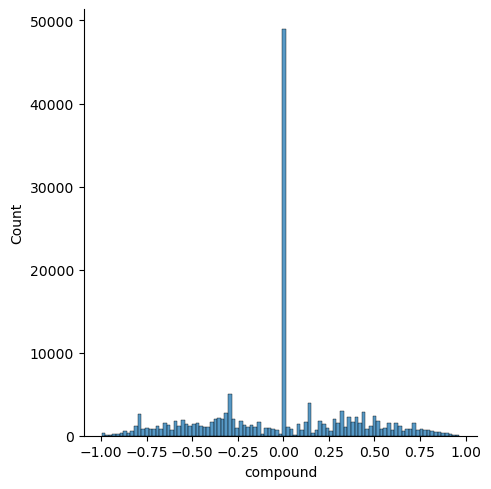

In [ ]:
sns.displot(y) # Definitely skewed towards 0, but a bit of dissonance.

In [73]:
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train)

In [74]:
## Need to set up Linear regression
lin_reg = LinearRegression()
lin_model = lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_validate)

In [75]:
score = lin_model.score(X_test, y_test)
print(f"R² score: {score:.4f}")

R² score: -2.2467
